# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [140]:
iris = load_iris()
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = pd.DataFrame(iris.data)
X.columns = feature

y = y = pd.DataFrame(iris.target, columns=["species"])
name = ["species"] 
y.columns = name


In [141]:
Xy = X.join( y) 
display(Xy)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [142]:
# 'sepal_length','petal_length','species'のデータ抽出
Xy = Xy.loc[:, ['sepal_length','petal_length','species']]

In [143]:
# virgicolorとvirginicaのデータ抽出
df= Xy[Xy['species']>=1]

In [144]:
df

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


# 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

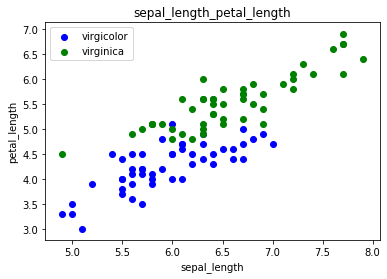

In [145]:
#散布図
virgicolor = df[df.species == 1] 
virginica = df[df.species == 2]

plt.title('sepal_length_petal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(virgicolor['sepal_length'], virgicolor['petal_length'], c='blue', label='virgicolor')
plt.scatter(virginica['sepal_length'],virginica['petal_length'], c='green', label='virginica')
plt.legend()
plt.show();

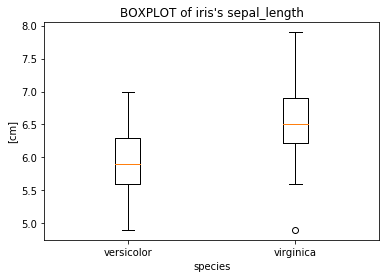

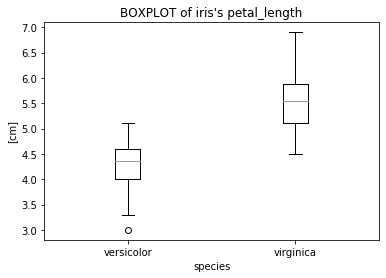

In [146]:
#箱ひげ図
features = ["sepal_length", "petal_length"]

for feature in features:
    plt.boxplot([df[df["species"]==1][feature], df[df["species"]==2][feature]])
    plt.xticks([1, 2], iris.target_names[1:])
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('species')
    plt.show()

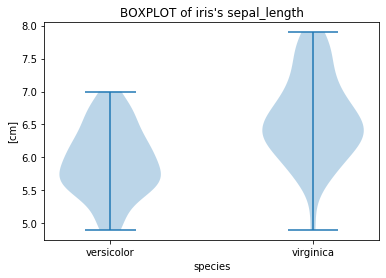

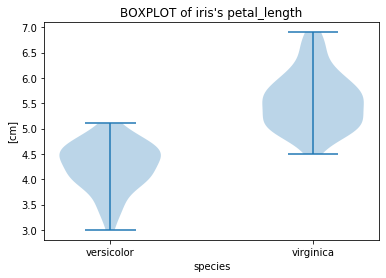

In [147]:
# バイオリン図
for feature in features:
    plt.violinplot([df[df["species"]==1][feature], df[df["species"]==2][feature]])
    plt.xticks([1, 2], iris.target_names[1:])
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('species')
    plt.show()

# 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [148]:
from sklearn.model_selection import train_test_split

In [198]:
# dfをndarrayに変換
Xy_df = df.values
#説明変数と目的変数の分割
X = Xy_df[:, [0,1]]
y = Xy_df[:,2]
X[y==1].shape

(50, 2)

In [180]:
# trainデータとtestデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


In [181]:
display("X_train",X_train,"X_test", X_test,"y_train", y_train,"y_test", y_test)

'X_train'

array([[5.1, 3. ],
       [6.3, 4.7],
       [5.9, 5.1],
       [6.4, 5.6],
       [6.2, 4.8],
       [6.5, 5.1],
       [7.4, 6.1],
       [6.7, 5.6],
       [7.7, 6.9],
       [5.8, 5.1],
       [6.7, 5. ],
       [6.2, 4.5],
       [4.9, 4.5],
       [5.7, 5. ],
       [6.7, 5.7],
       [6.4, 4.5],
       [6.4, 5.3],
       [5.8, 4. ],
       [6.1, 4.6],
       [6.5, 4.6],
       [6.7, 4.4],
       [5.8, 4.1],
       [5.5, 4.4],
       [5.6, 4.1],
       [5.7, 4.5],
       [6.9, 5.1],
       [7.2, 6.1],
       [7. , 4.7],
       [5.4, 4.5],
       [6. , 4.5],
       [6.3, 6. ],
       [5.9, 4.2],
       [6. , 4.5],
       [6.1, 4.7],
       [7.1, 5.9],
       [5. , 3.5],
       [5.5, 3.7],
       [6.5, 5.5],
       [7.3, 6.3],
       [7.2, 5.8],
       [7.7, 6.1],
       [5.8, 3.9],
       [6.1, 5.6],
       [5.6, 3.6],
       [6.9, 5.4],
       [5.6, 3.9],
       [5.7, 3.5],
       [5.7, 4.1],
       [6.5, 5.2],
       [6.2, 5.4],
       [6. , 5. ],
       [5.9, 4.8],
       [6.7,

'X_test'

array([[6.8, 4.8],
       [6.3, 5.6],
       [6.9, 4.9],
       [7.6, 6.6],
       [7.2, 6. ],
       [6.8, 5.9],
       [5.6, 4.5],
       [6.3, 4.9],
       [6.5, 5.8],
       [6.7, 5.2],
       [6.3, 5.6],
       [5.8, 5.1],
       [6.4, 5.6],
       [6.1, 4.7],
       [4.9, 3.3],
       [5.5, 3.8],
       [6.3, 4.9],
       [6.4, 4.3],
       [6. , 5.1],
       [6.6, 4.6],
       [5. , 3.3],
       [6.8, 5.5],
       [5.5, 4. ],
       [5.6, 4.9],
       [5.7, 4.2]])

'y_train'

array([1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2.,
       1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1.,
       2., 1., 2., 2., 2., 1., 1.])

'y_test'

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1.])

# 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

In [182]:
from sklearn.preprocessing import StandardScaler
# trainデータのフィッテイング
sc_x = StandardScaler()
sc_x.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [183]:
#trainとtestデータのtransform
X_train_std = sc_x.transform(X_train)
X_test_std = sc_x.transform(X_test)

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit (X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [185]:
y_pred = knn.predict(X_test_std)              # 予測実行
print("y_pred(予測値)：", y_pred)


y_pred(予測値)： [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


# 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。



In [186]:
from sklearn import metrics

### scikit-learnを使い4種類の指標を計算する

In [187]:
# 正解率
print('正解率:',metrics.accuracy_score(y_test, y_pred ))

# 適合率
print("適合率", metrics.precision_score(y_test, y_pred))

#再現率
print('再現率', metrics.recall_score(y_test, y_pred))

# F値
print('F値', metrics.f1_score(y_test, y_pred))

正解率: 0.88
適合率 1.0
再現率 0.7692307692307693
F値 0.8695652173913044


### 混同行列をscikit-learnを使い表示する

In [188]:
metrics.confusion_matrix(y_test, y_pred)

array([[10,  3],
       [ 0, 12]])

### 4種類の指標値の意味について簡単に調査して文章でまとめる

- <strong>正解率（ACC)</strong>
<br>全体(真陽性＋真陰性＋偽陽性＋偽陰性)の数のうち、正解した数（真陽性＋真陰性）の割合
<p>
- <strong>適合率 （PRE)</strong>
<br>真陽性と真陰性の合計数のうち、真陽性の数の割合
<p>
- <strong>再現率（REC）</strong>
<br>真陽性と偽陰性の合計数のうち、真陽性の数の割合
<p>
- <strong>F値 （F１）</strong>
<br>適合率と再現率を掛け合わせた値を適合率と再現率の和で割ったのち、２倍した値

# 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [189]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model,step=0.2,resolution=0.02, title='decision region'):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        print(i)
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [199]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

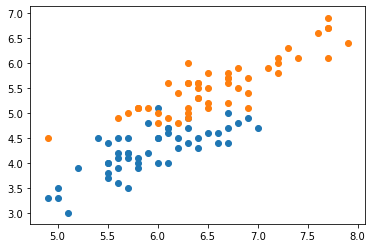

In [160]:
plt.scatter(X[y==1][:, 0],X[y==1][:, 1] )
plt.scatter(X[y==2][:, 0],X[y==2][:, 1] )

0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: No contour levels were found within the data range.


NameError: name 'target_names' is not defined

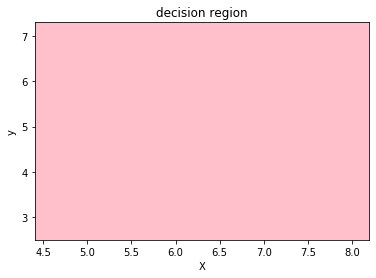

In [161]:
#y_trainを１次元配列に変換
decision_region(X, y, knn)

# 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

## ロジスティック回帰

In [162]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_train_std, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_pred2 = lr.predict(X_test_std)              # 予測実行
print("y_pred(予測値)：", y_pred2)

y_pred(予測値)： [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


In [164]:
# 正解率
print('正解率:',metrics.accuracy_score(y_test, y_pred2))

# 適合率
print("適合率", metrics.precision_score(y_test, y_pred2))

#再現率
print('再現率', metrics.recall_score(y_test, y_pred2))

# F値
print('F値', metrics.f1_score(y_test, y_pred2))

正解率: 0.92
適合率 1.0
再現率 0.8461538461538461
F値 0.9166666666666666


0


NameError: name 'target_names' is not defined

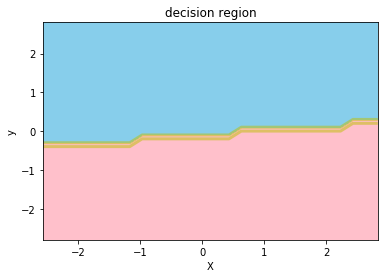

In [165]:
decision_region(X_train_std, y_train, lr)

# SVM

In [166]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [167]:
y_pred3 = svm.predict(X_test_std)              # 予測実行
print("y_pred(予測値)：", y_pred3)

y_pred(予測値)： [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


In [168]:
# 正解率
print('正解率:',metrics.accuracy_score(y_test, y_pred3))

# 適合率
print("適合率", metrics.precision_score(y_test, y_pred3))

#再現率
print('再現率', metrics.recall_score(y_test, y_pred3))

# F値
print('F値', metrics.f1_score(y_test, y_pred3))

正解率: 0.92
適合率 1.0
再現率 0.8461538461538461
F値 0.9166666666666666


0


NameError: name 'target_names' is not defined

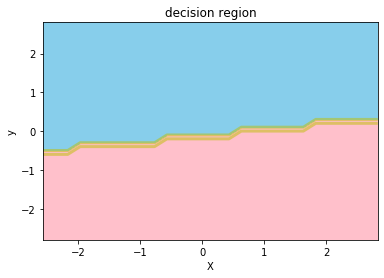

In [169]:
decision_region(X_train_std, y_train, svm)

# 決定木

In [170]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [171]:
y_pred4 = tree.predict(X_test_std)              # 予測実行
print("y_pred(予測値)：", y_pred4)

y_pred(予測値)： [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


In [ ]:
# 正解率
print('正解率:',metrics.accuracy_score(y_test, y_pred4))

# 適合率
print("適合率", metrics.precision_score(y_test, y_pred4))

#再現率
print('再現率', metrics.recall_score(y_test, y_pred4))

# F値
print('F値', metrics.f1_score(y_test, y_pred4))

In [ ]:
decision_region(X_train_std, y_train, tree)

# ランダムフォレスト

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train_std, y_train)

In [ ]:
y_pred5 = forest.predict(X_test_std)              # 予測実行
print("y_pred(予測値)：", y_pred5)

In [ ]:
# 正解率
print('正解率:',metrics.accuracy_score(y_test, y_pred5))

# 適合率
print("適合率", metrics.precision_score(y_test, y_pred5))

#再現率
print('再現率', metrics.recall_score(y_test, y_pred5))

# F値
print('F値', metrics.f1_score(y_test, y_pred5))

In [ ]:
 decision_region(X_train_std, y_train, forest)

In [ ]:
KNN= [metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),  metrics.f1_score(y_test, y_pred)]

RC = [metrics.accuracy_score(y_test, y_pred2), metrics.precision_score(y_test, y_pred2),metrics.recall_score(y_test, y_pred2),  metrics.f1_score(y_test, y_pred2)]

SVM = [metrics.accuracy_score(y_test, y_pred3), metrics.precision_score(y_test, y_pred3),metrics.recall_score(y_test, y_pred3),  metrics.f1_score(y_test, y_pred3)]

tree_des = [metrics.accuracy_score(y_test, y_pred4), metrics.precision_score(y_test, y_pred4),metrics.recall_score(y_test, y_pred4),  metrics.f1_score(y_test, y_pred4)]

random_forest = [metrics.accuracy_score(y_test, y_pred5), metrics.precision_score(y_test, y_pred5),metrics.recall_score(y_test, y_pred5),  metrics.f1_score(y_test, y_pred5)]


In [ ]:
method_df = pd.DataFrame([KNN, RC, SVM, tree_des, random_forest])

In [ ]:
method_df.columns = ['正解率','適合率','再現率','F1値']
method_df.index = ["KNN","ロジスティック回帰","SVM","決定木","ランダムフォレスト"]

display(method_df)

今回の各手法での判別結果では線形に分割ができるロジスティック回帰とサポートベクターマシーンの正解率含め全ての指標で高い結果となった。２値分類で線形に分割できるものはこの2つの手法がもっとも適当なのかもしれない。